# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [112]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [113]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [114]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [25]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [29]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

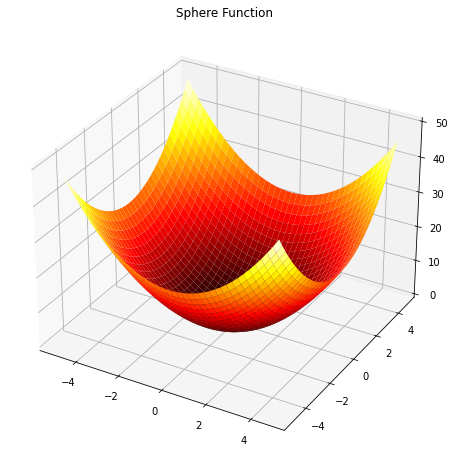

In [117]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

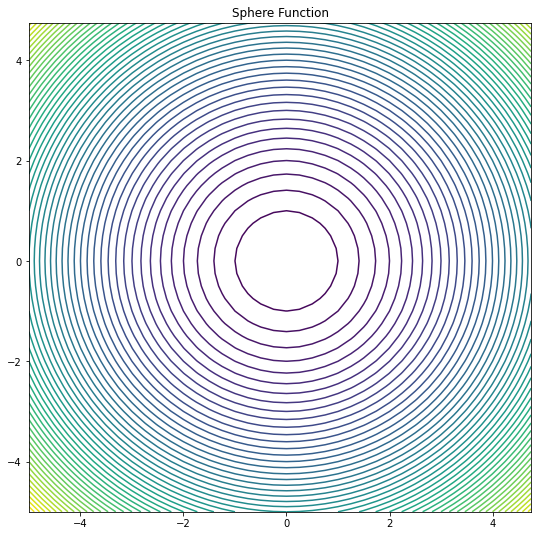

In [118]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

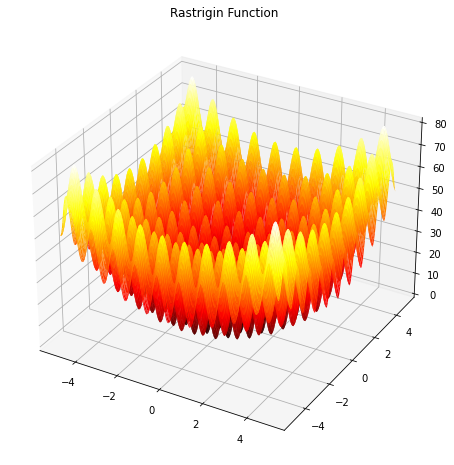

In [119]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

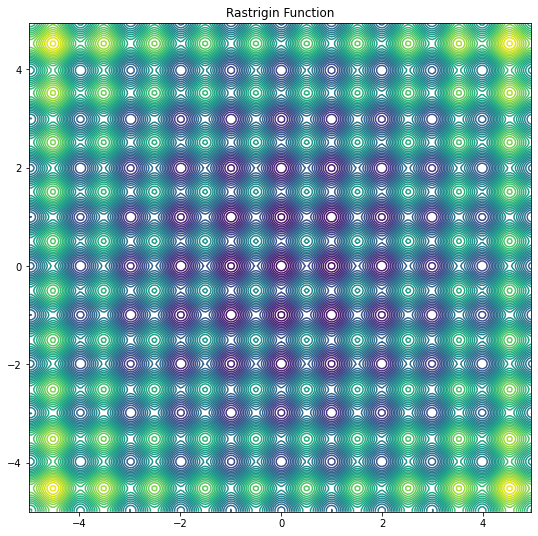

In [120]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

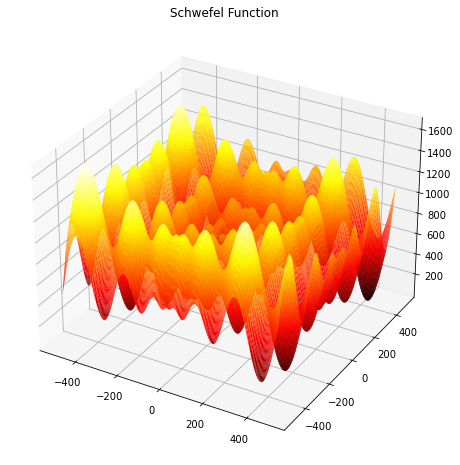

In [121]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

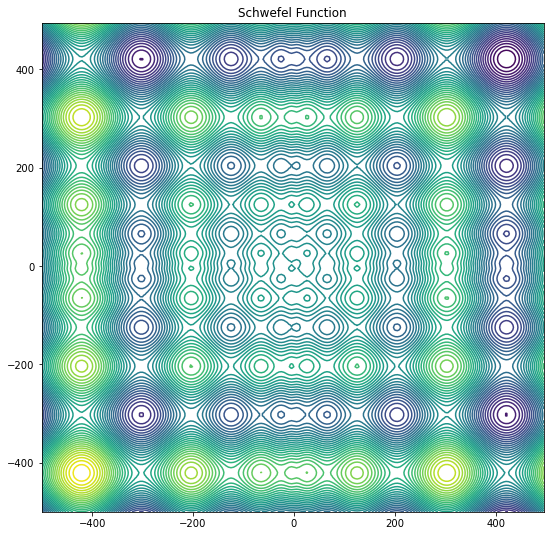

In [122]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

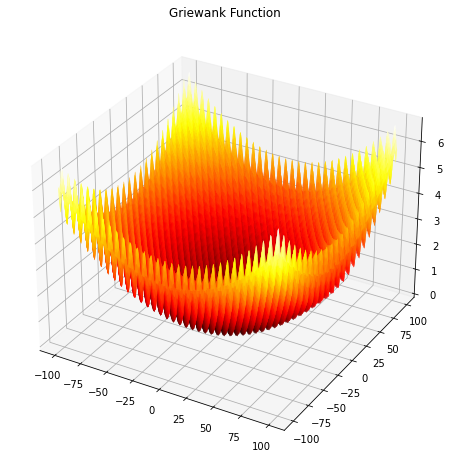

In [123]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

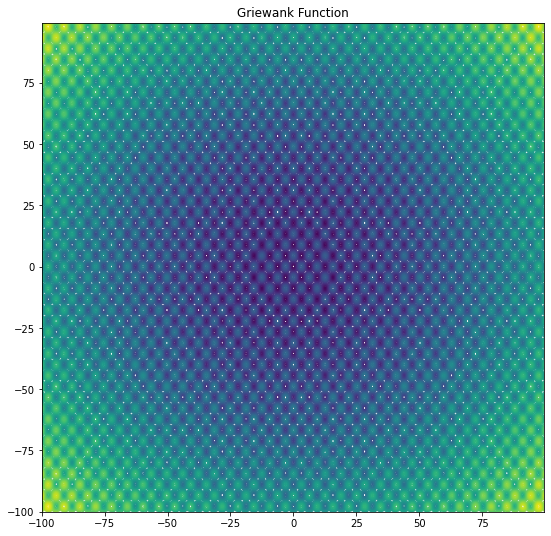

In [124]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [125]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [126]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

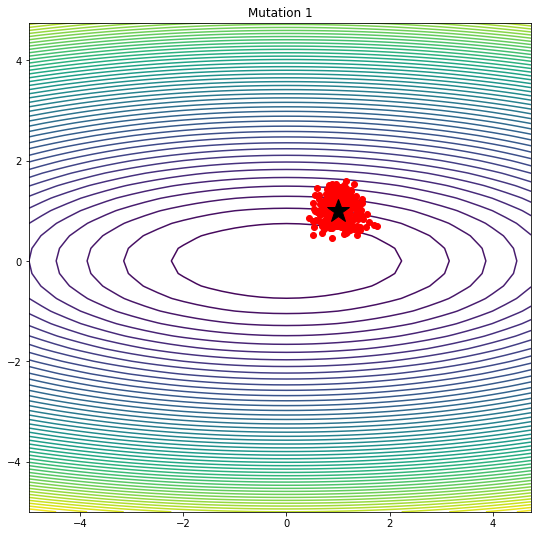

In [127]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [128]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

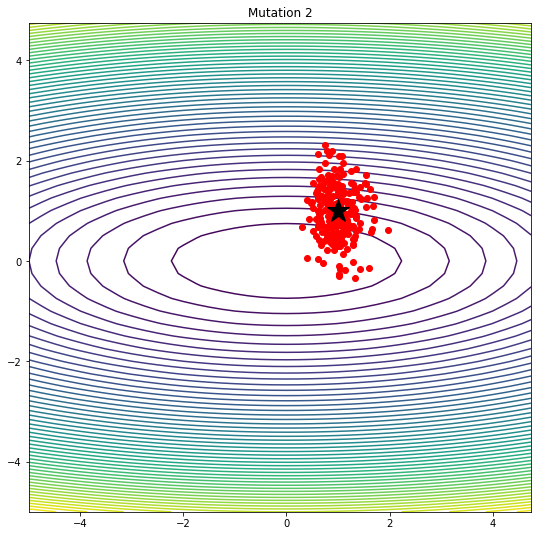

In [129]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [130]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky( np.array([[0.25, 0.25],[0.25, 0.5]])).T)

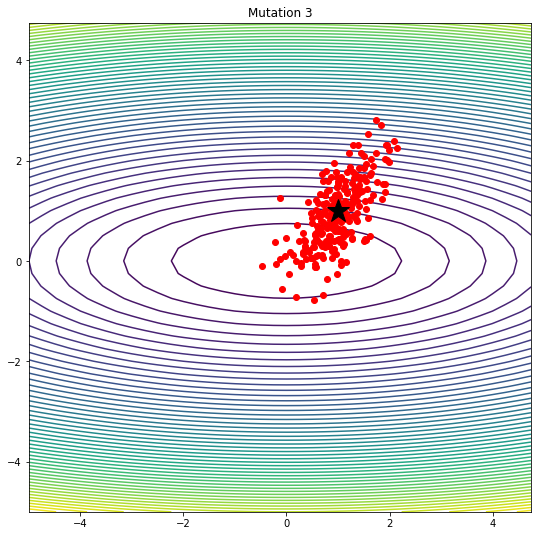

In [131]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [132]:
from IPython.core.display import display, HTML


In [23]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1,low=-10000,high=10000,mutation_type=2):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length) + 5
    

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        current_population_solutions[current_population_solutions < low] = low
        current_population_solutions[current_population_solutions > high] = high
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
        
        if mutation_type == 1:
            sig = 0.25
            children_population_solutions = np.array([c + sig * np.random.randn(1, chromosome_length) for c in children_population_solutions])[0]
        if mutation_type == 2:
            sigma = np.array([0.25, 0.5])
            children_population_solutions = np.array([c + sigma * np.random.randn(1, chromosome_length) for c in children_population_solutions])[0]
        if mutation_type == 3:
            Sig = np.array([[0.25, 0.25],[0.25, 0.5]])
            children_population_solutions = np.array([c + np.dot(np.random.randn(1, chromosome_length), np.linalg.cholesky(Sig).T) for c in children_population_solutions])[0]
        
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]

        current_population_objective_values = current_population_objective_values[I[:population_size]]
        
#         if t == 20:
#             print(current_population_sigmas)
        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]


#         if np.mod(t, log_frequency) == 0:
#             print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

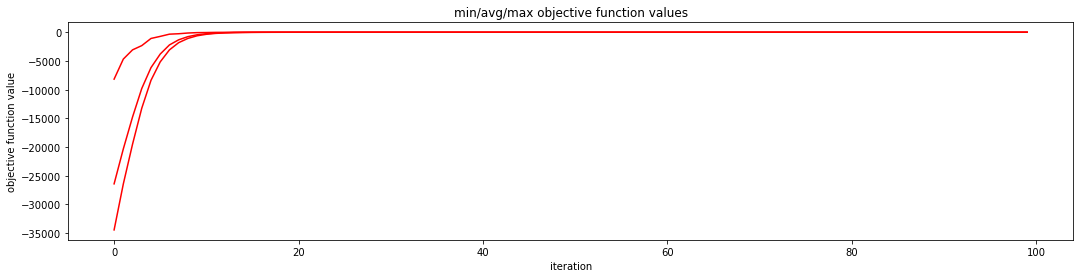

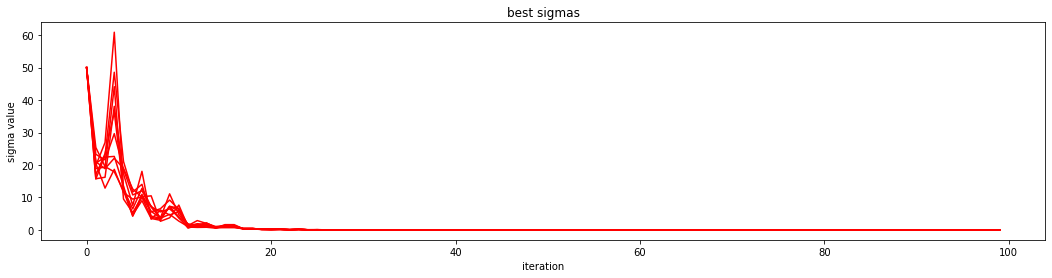

In [134]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

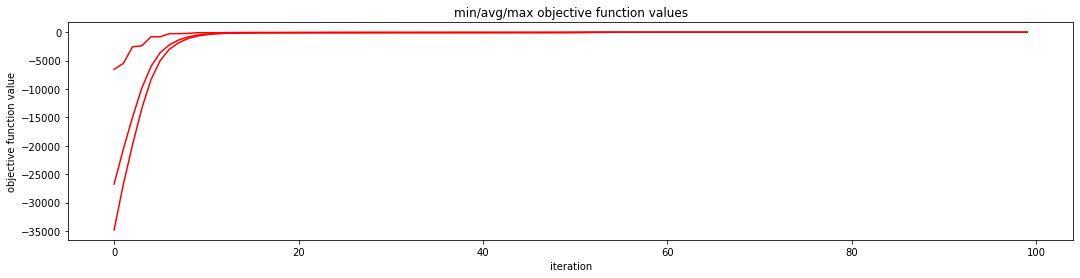

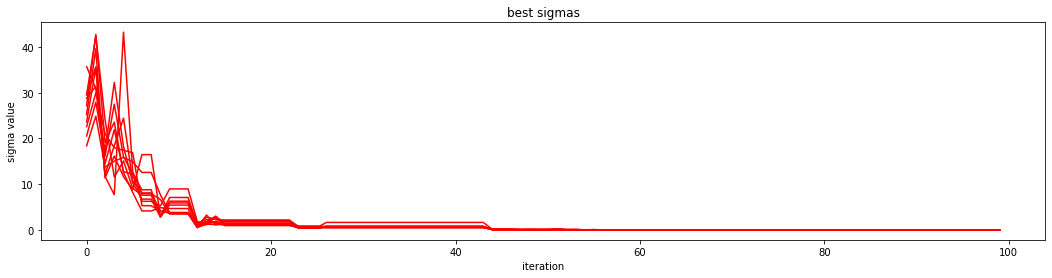

In [135]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

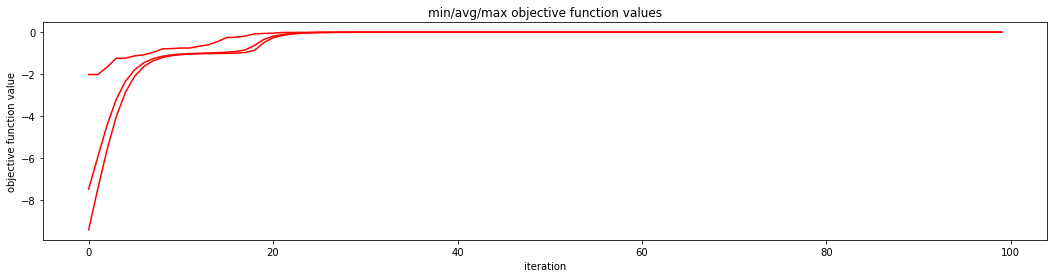

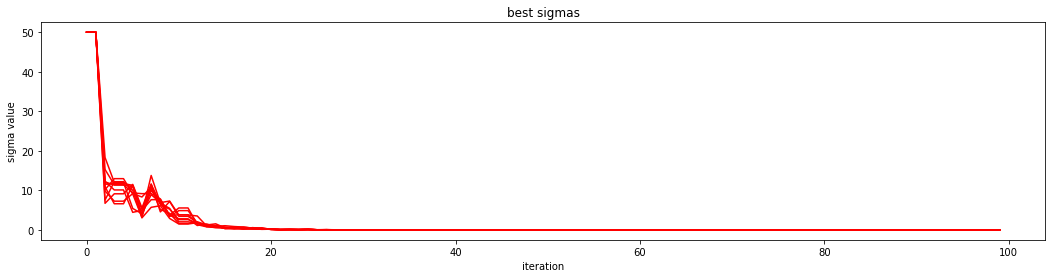

In [136]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### zad1

In [137]:
instances = [
    'Sphere function:',(objective_function_F1, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F1, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101),
    (objective_function_F1, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101),
    (objective_function_F1, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
    'Rastrigin function:',(objective_function_F6, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F6, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101),
    (objective_function_F6, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101),
    (objective_function_F6, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
    'Schwefel function:',(objective_function_F7, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101,-500,500),
    (objective_function_F7, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101,-500,500),
    (objective_function_F7, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101,-500,500),
    (objective_function_F7, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101,-500,500),
    'Griewank function:',(objective_function_F8, 10, 1000, 100, 2000, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F8, 20, 500, 100, 1000, 2, 10.0, 1/np.sqrt(2*20), 1/np.sqrt(2*np.sqrt(20)), 101),
    (objective_function_F8, 50, 1000, 100, 2000, 3, 10.0, 1/np.sqrt(2*50), 1/np.sqrt(2*np.sqrt(50)), 101),
    (objective_function_F8, 100, 1000, 100, 2000, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
]

Sphere function:
0.0


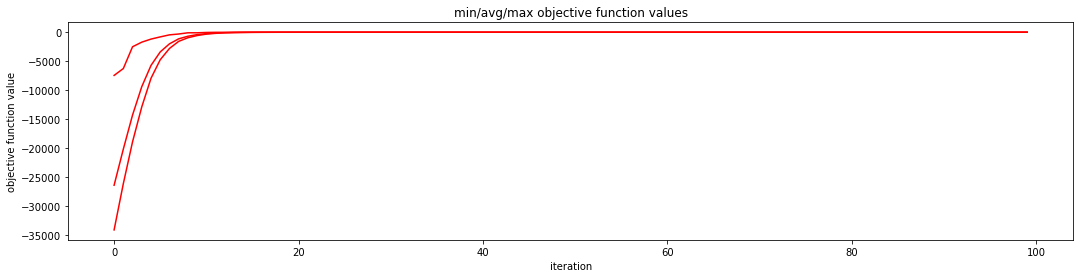

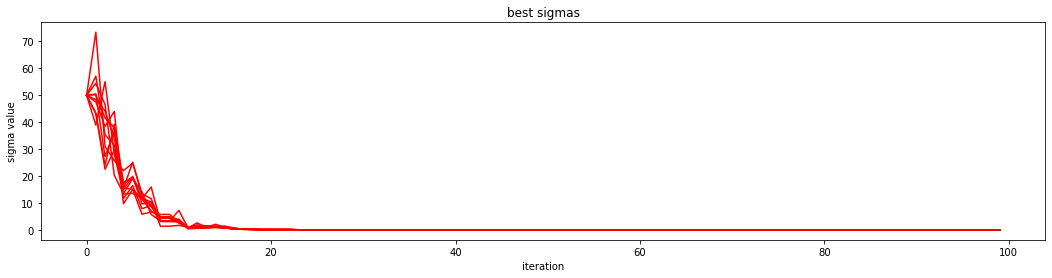

0.0


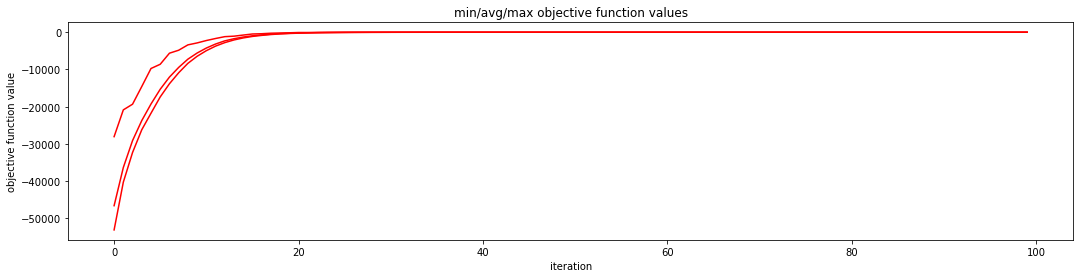

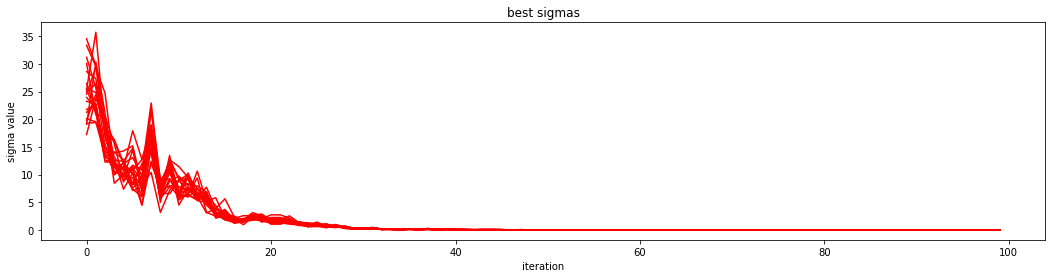

0.0


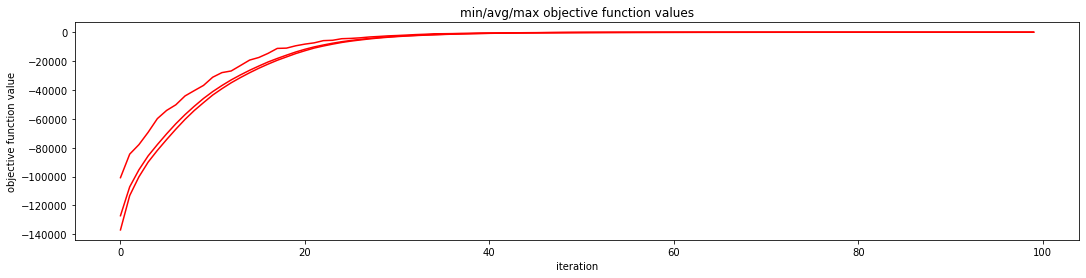

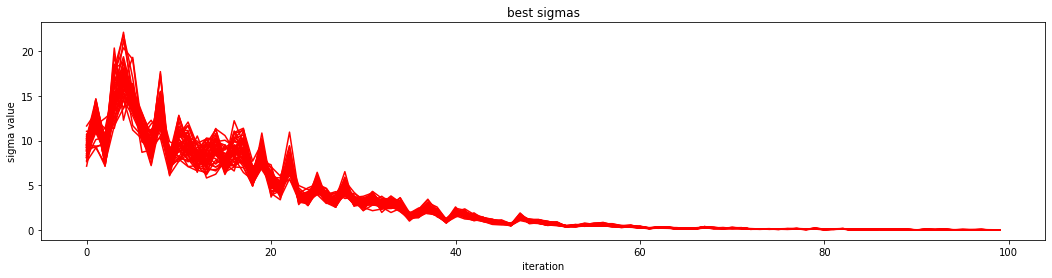

0.0


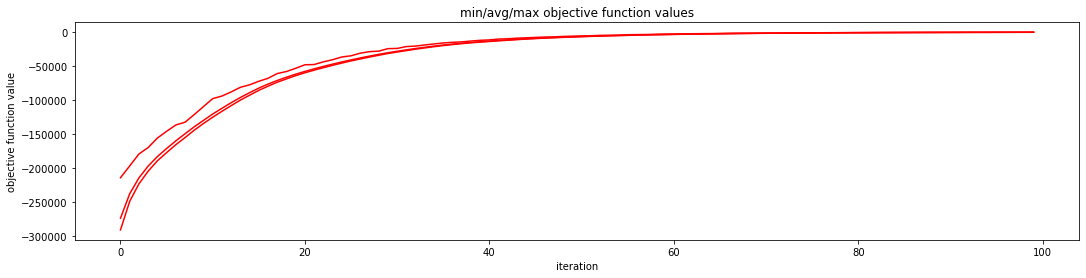

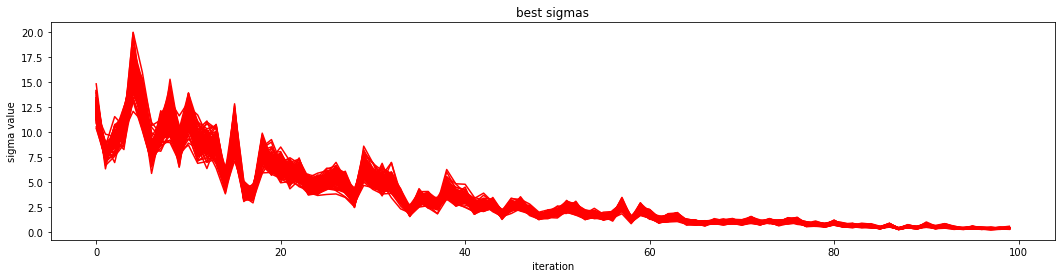

Rastrigin function:
0.0


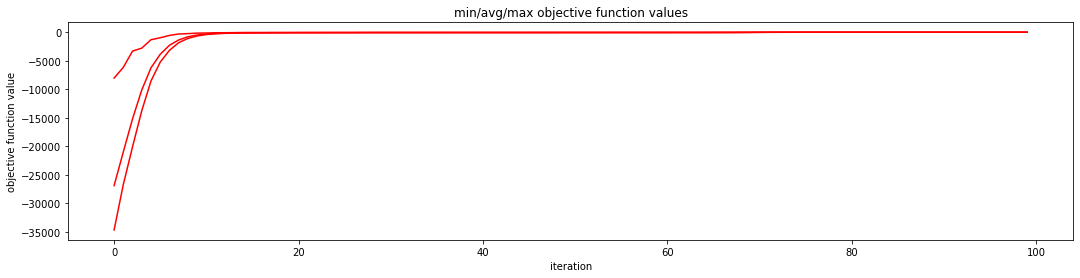

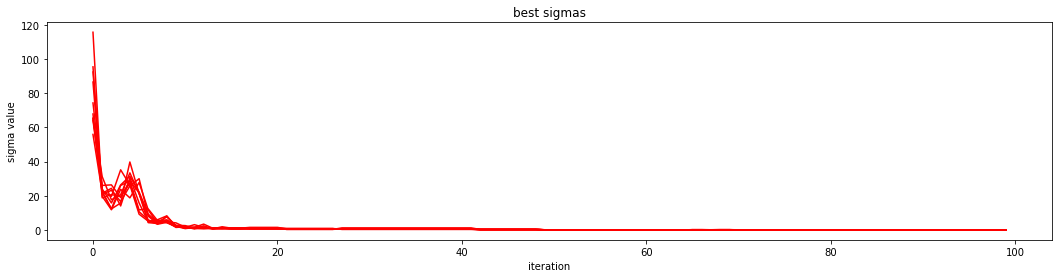

0.0


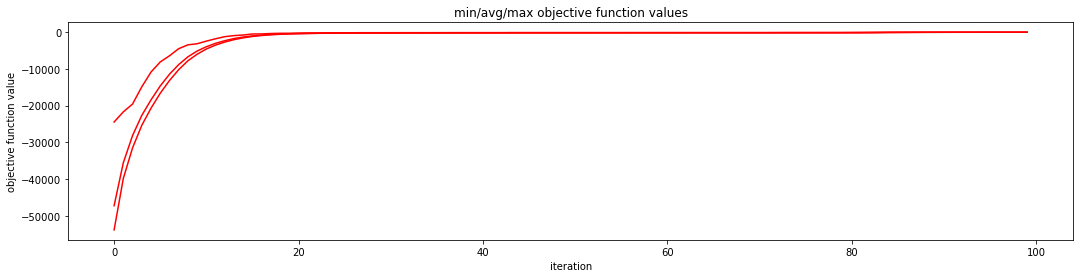

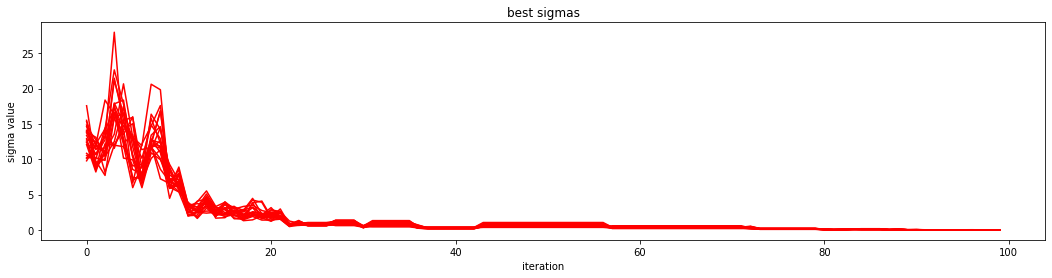

0.0


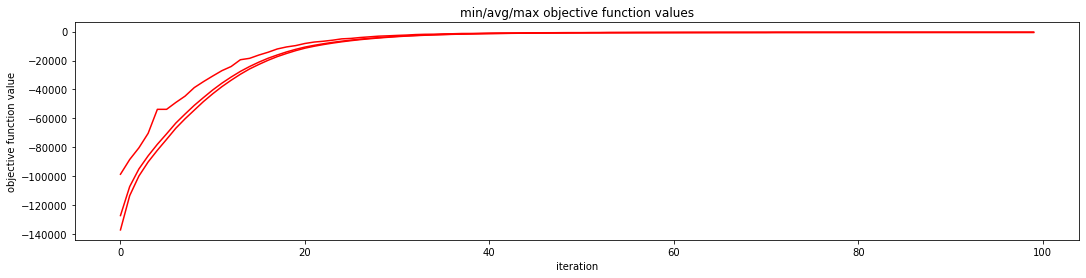

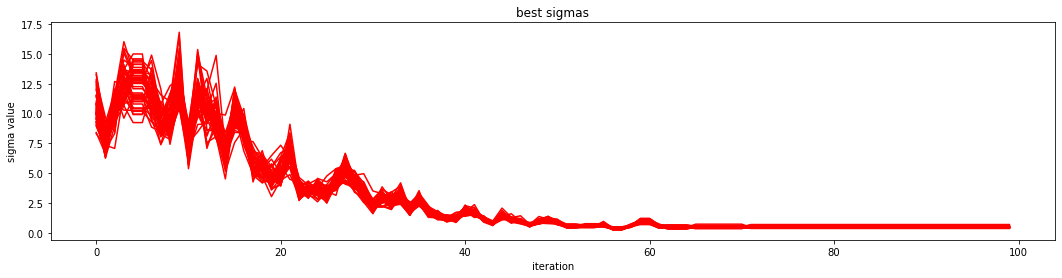

0.0


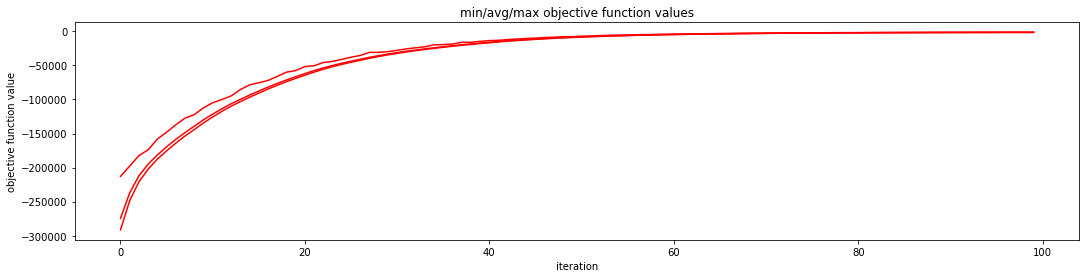

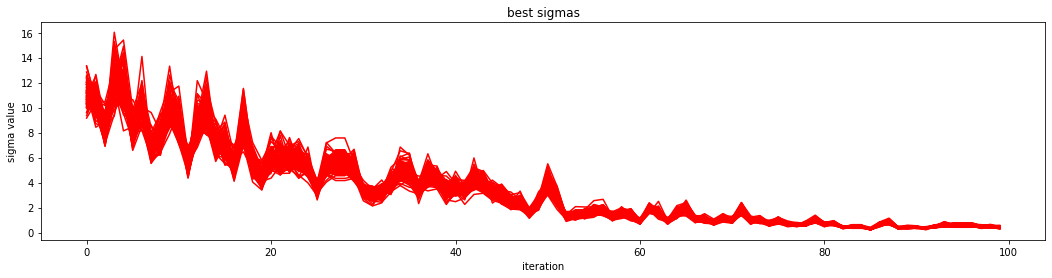

Schwefel function:
3.398750678739752e+23


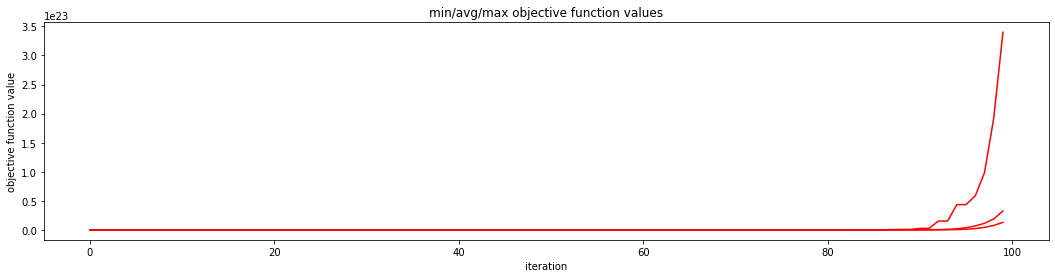

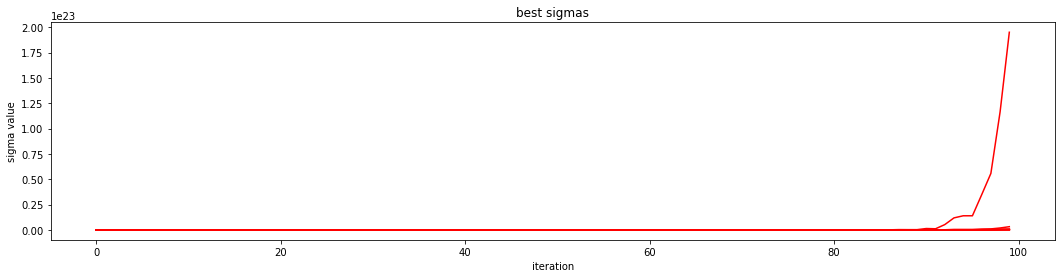

0.0


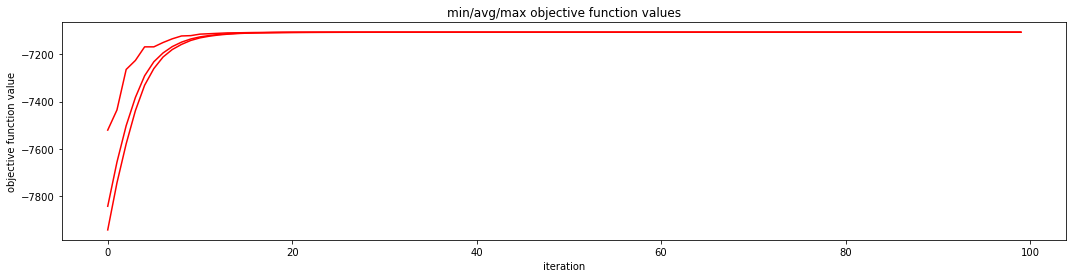

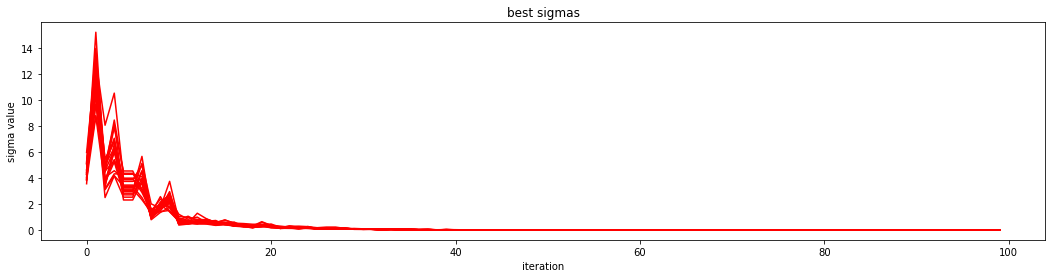

0.0


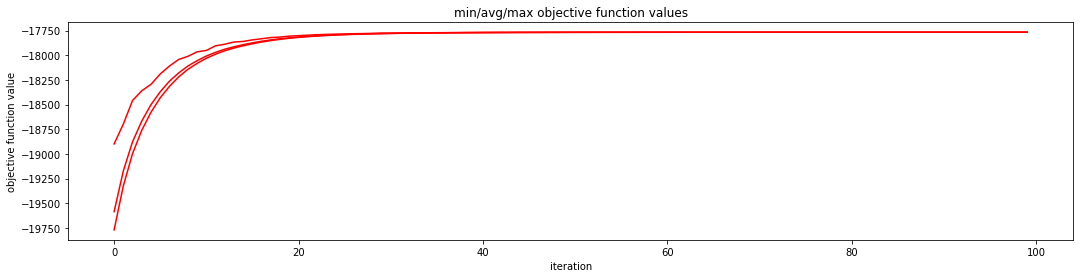

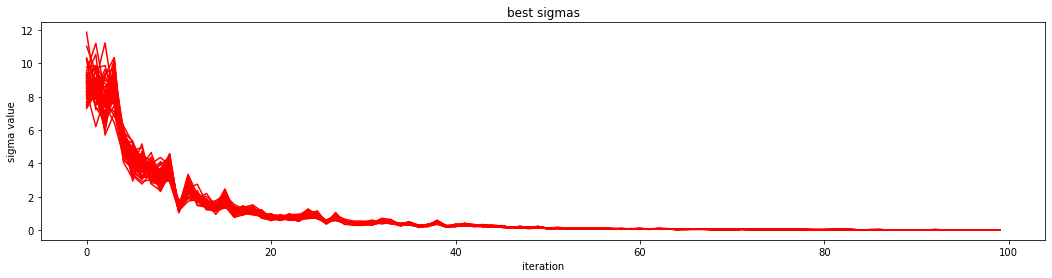

0.0


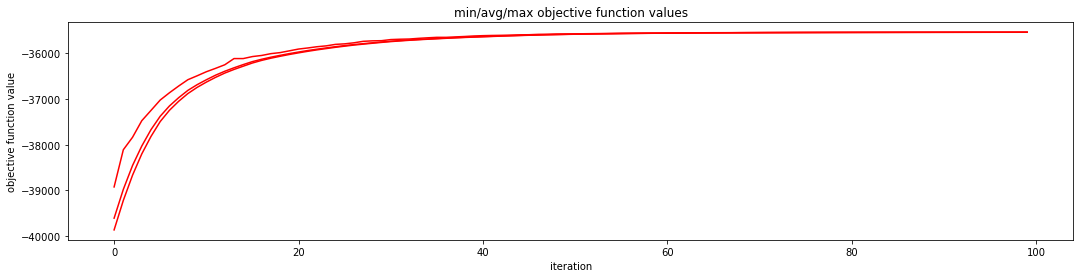

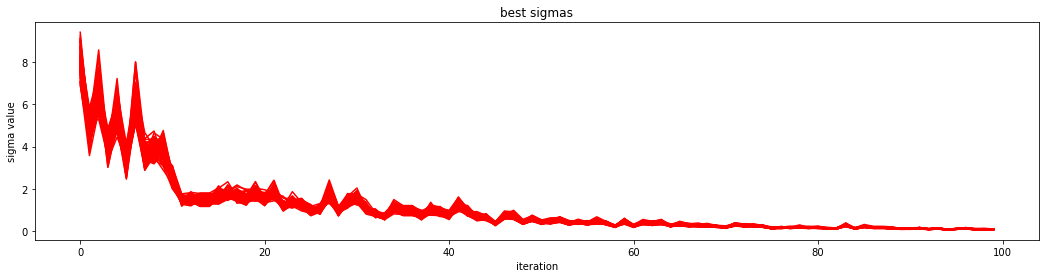

Griewank function:
0.0


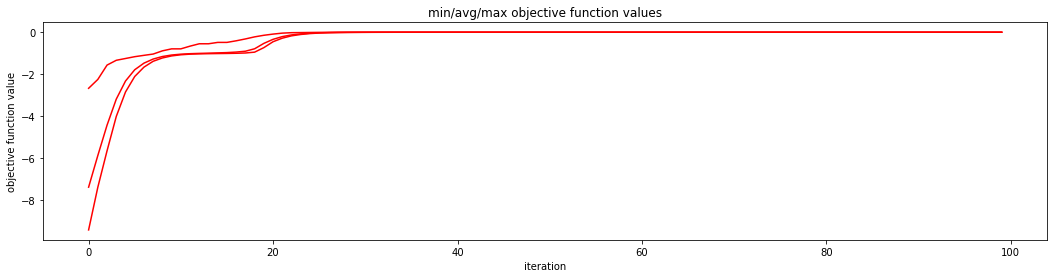

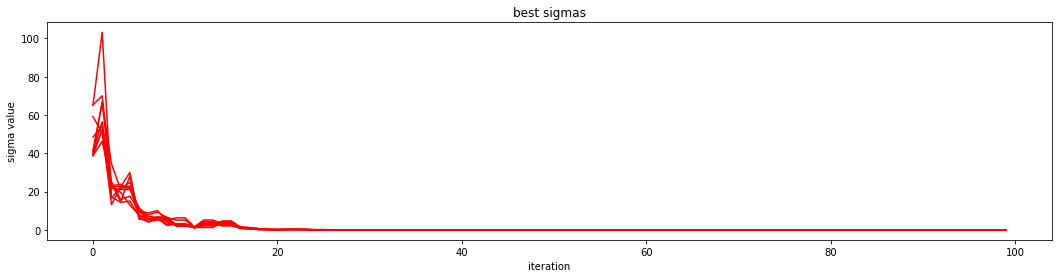

0.0


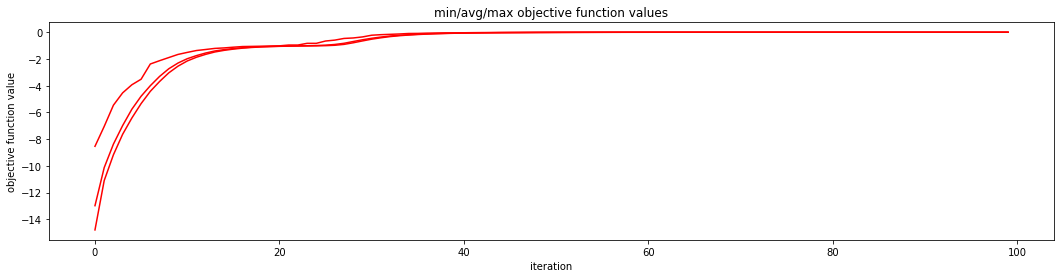

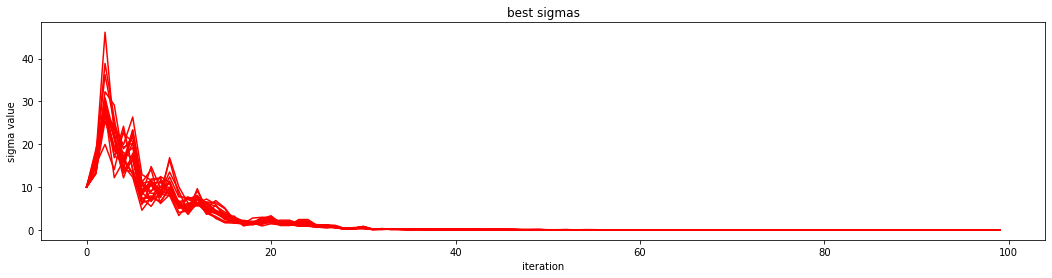

0.0


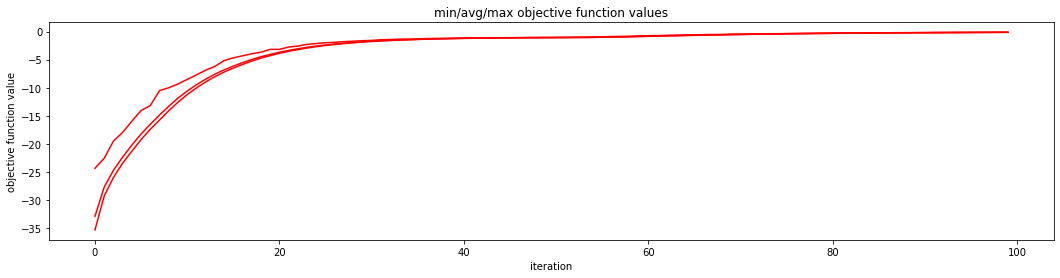

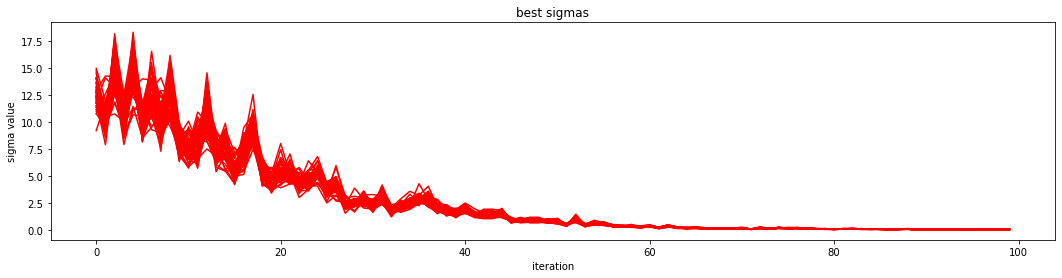

0.0


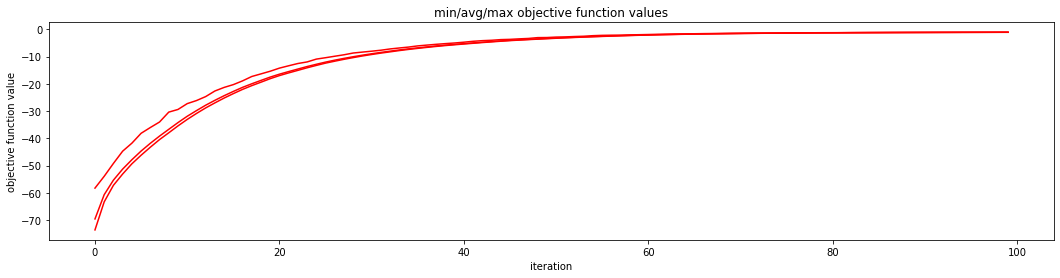

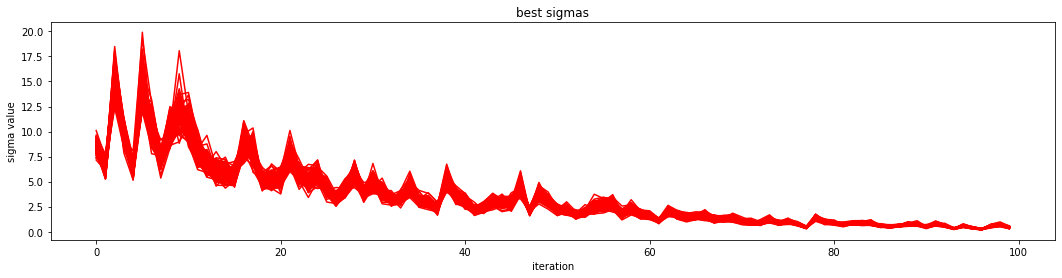

In [138]:
for i in instances:
    if type(i) != str:
        if i[0] == objective_function_F7:
            best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11])            
        else:
            best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9])
        print(best_objective_value)
        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-')
        plt.plot(history_objective_values[:, 1], 'r-')
        plt.plot(history_objective_values[:, 2], 'r-')
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values')
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()
    else:
        print(i)

### zad2

In [38]:
N = 250
d = 2
obj_f = objective_function_F1
original_individual = np.array([[1, 1]])

In [41]:
def mutation1(x, sigma):
    return x + sigma * np.random.randn(N, d)

In [42]:
def mutation2(x, sigma):
    return x + sigma * np.random.randn(N, d)

In [45]:
def mutation3(x, sigma):
    return x + np.dot(np.random.randn(N, d), np.linalg.cholesky(sigma).T)

In [46]:
mutations_f = {'mutation1': (mutation3,np.array([[0.25, 0.0],[0.0, 0.25]])), 'mutation2': (mutation3,np.array([[0.25, 0.0],[0.0, 0.5]])), 'mutation3': (mutation3,np.array([[0.25, 0.25],[0.25, 0.5]]))}

In [151]:
functions = {'sphere': objective_function_F1, 'Rastrigin': objective_function_F6, 'Schwefel': objective_function_F7, 'Griewank': objective_function_F8}

In [243]:
for kf,vf in functions.items():
    obj_f = vf
    print(kf,' function')
    for k,v in mutations_f.items():
        m_f, sigma = v
        mutations = m_f(original_individual, sigma)
        avg, best_avg = 0,0
        for i in range(100):
            avg += np.sum(obj_f(mutations) < obj_f(original_individual))
            best_avg +=  np.max(obj_f(mutations))
        best_avg /= 100
        avg /= 100

        print('100 iterations avg better: {}, avg max: {}'.format(avg, best_avg))
    
    

sphere  function
100 iterations avg better: 129.0, avg max: -0.5130871709900672
100 iterations avg better: 129.0, avg max: -0.09881400417833743
100 iterations avg better: 134.0, avg max: -0.05207975973140673
Rastrigin  function
100 iterations avg better: 250.0, avg max: -2.0934160862647673
100 iterations avg better: 250.0, avg max: -2.1477255587058726
100 iterations avg better: 248.0, avg max: -0.026623769391012075
Schwefel  function
100 iterations avg better: 131.0, avg max: -834.9005118313056
100 iterations avg better: 127.0, avg max: -834.5959798283876
100 iterations avg better: 128.0, avg max: -832.5938687353918
Griewank  function
100 iterations avg better: 145.0, avg max: -0.13781222336501517
100 iterations avg better: 141.0, avg max: -0.09374213722329591
100 iterations avg better: 122.0, avg max: -0.0013323154070684629


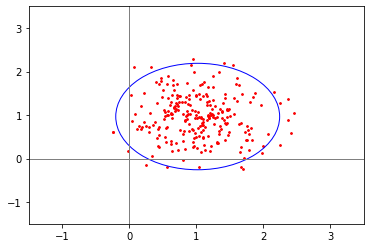

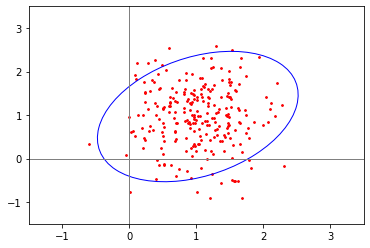

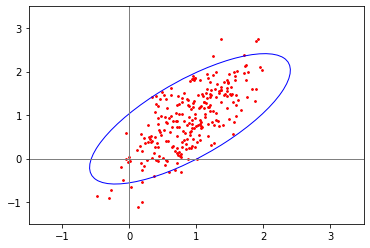

In [58]:
for k,v in mutations_f.items():
    m_f, sigma = v
    a = sigma[0][0]
    b = sigma[0][1]
    c = sigma[1][1]
    mutations = m_f(original_individual,sigma)
    fig, ax = plt.subplots()
    x, y = mutations[:,0], mutations[:,1]
    ax.scatter(x, y, s=0.5)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    lambda_1 = (a+c)/2 + np.sqrt(((a-c)/2)**2 + b**2)
    lambda_2 = (a+c)/2 - np.sqrt(((a-c)/2)**2 + b**2)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    ellipse = Ellipse((0, 0),edgecolor='b',facecolor='none', width=np.sqrt(5.991*lambda_1) * 2, height=np.sqrt(5.991*lambda_2) * 2)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    ax.scatter(x, y, c='red', s=3)
    plt.xlim(-1.5,3.5)
    plt.ylim(-1.5,3.5)
    plt.show()

In [15]:
instances = [
    (objective_function_F1, 2, 10, 100, 20, 2, 50.0, 1/np.sqrt(2*10), 1/np.sqrt(2*np.sqrt(10)), 101),
    (objective_function_F1a, 2, 10, 100, 20, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
    (objective_function_F1b, 2, 10, 100, 20, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
    (objective_function_F1c, 2, 10, 100, 20, 2, 10.0, 1/np.sqrt(2*100), 1/np.sqrt(2*np.sqrt(100)), 101),
]

mutation_type 1
0.0


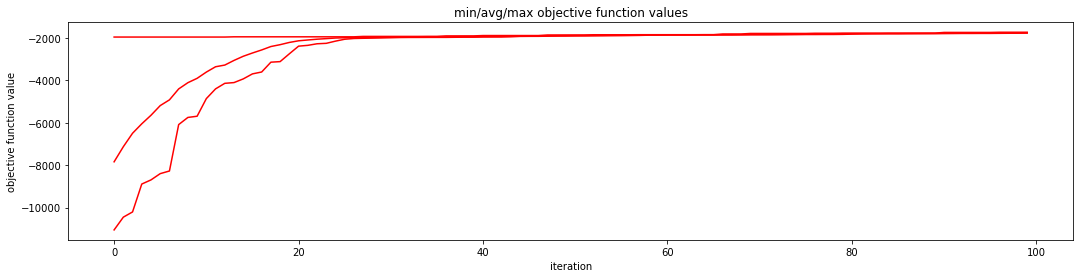

mutation_type 2
0.0


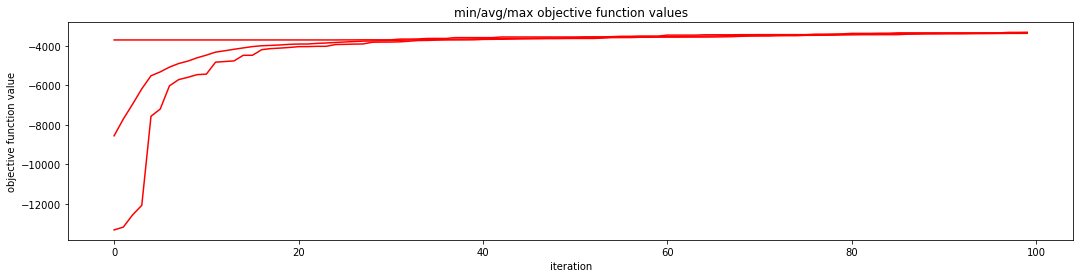

mutation_type 3
0.0


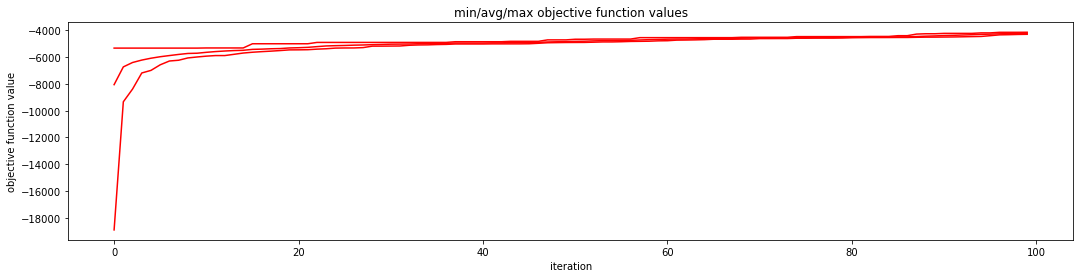

mutation_type 1
0.0


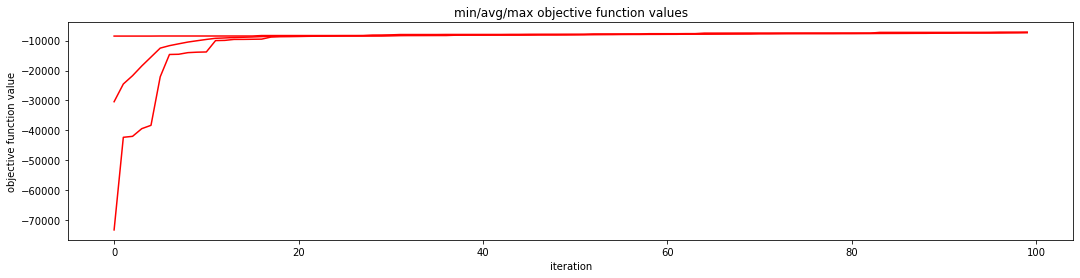

mutation_type 2
0.0


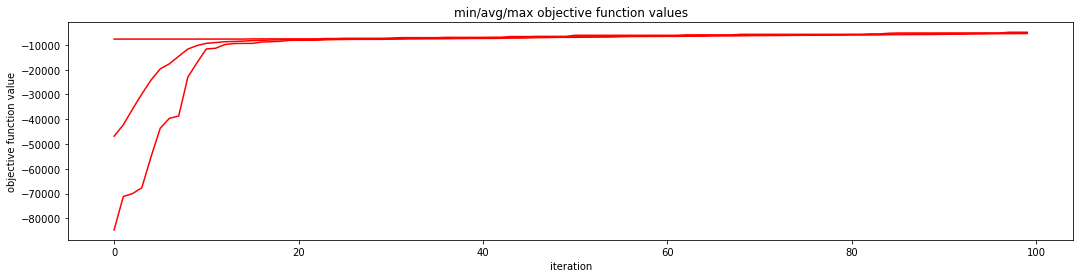

mutation_type 3
0.0


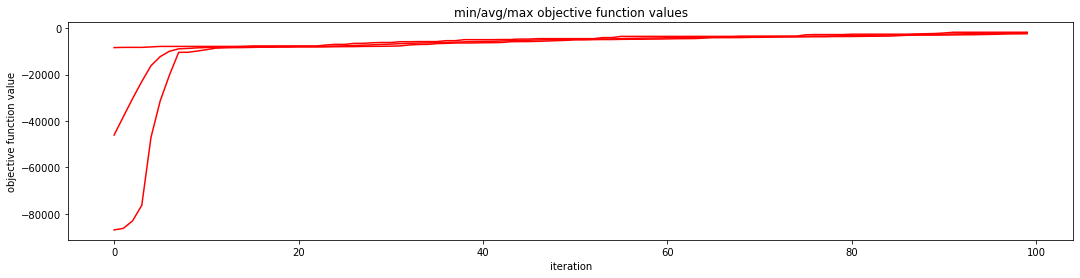

mutation_type 1
0.0


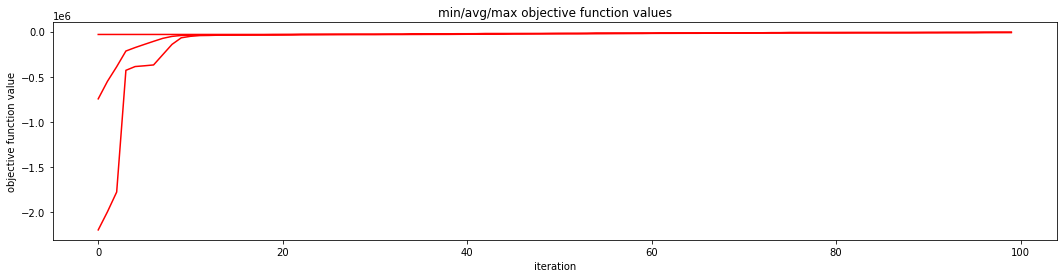

mutation_type 2
0.0


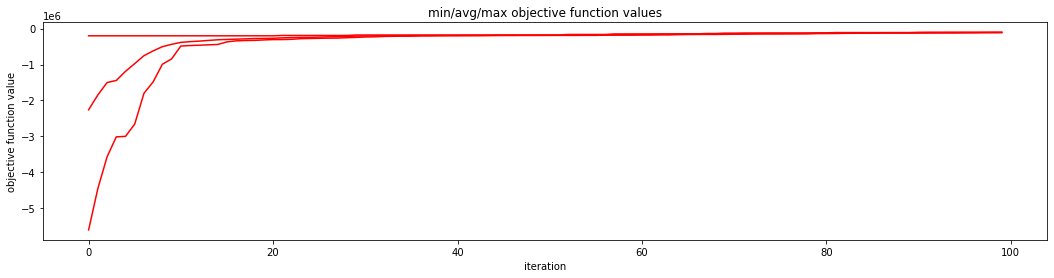

mutation_type 3
0.0


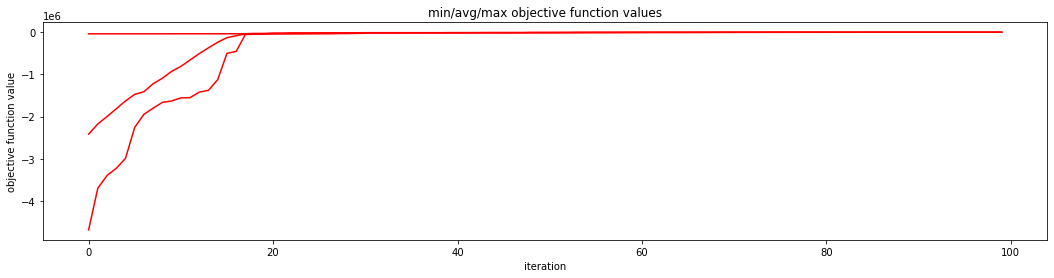

mutation_type 1
0.0


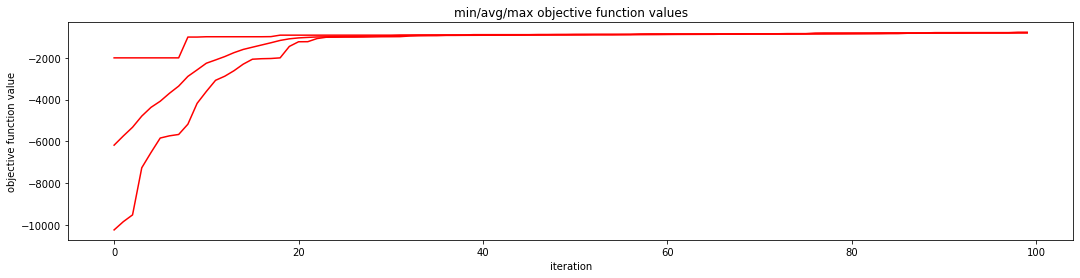

mutation_type 2
0.0


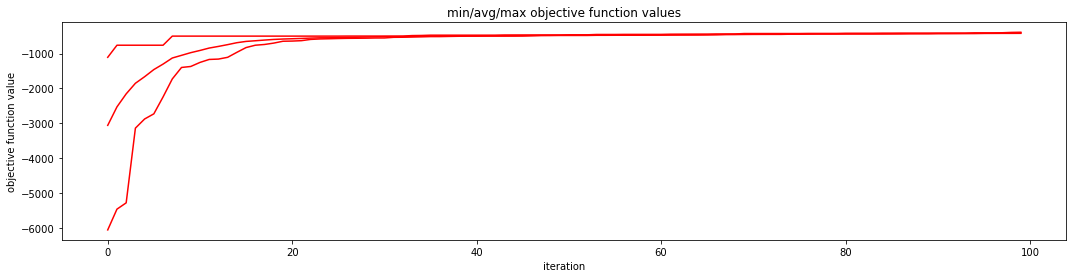

mutation_type 3
0.0


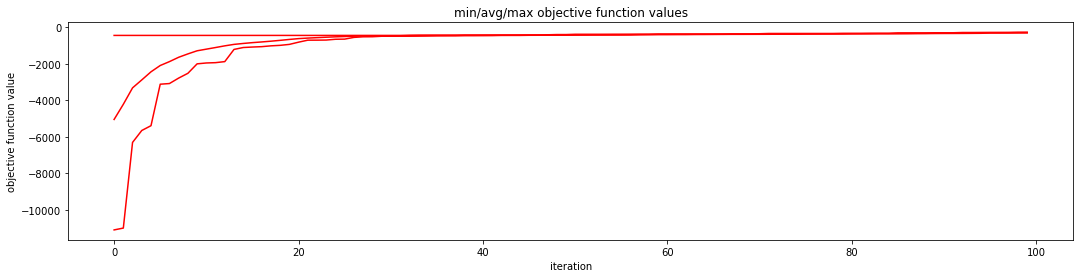

In [24]:
for i in instances:
    for m_type in range(1,4):
        print('mutation_type {}'.format(m_type))
        if type(i) != str:
            best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],mutation_type=m_type)
            print(best_objective_value)
            plt.figure(figsize=(18, 4))
            plt.plot(history_objective_values[:, 0], 'r-')
            plt.plot(history_objective_values[:, 1], 'r-')
            plt.plot(history_objective_values[:, 2], 'r-')
            plt.xlabel('iteration')
            plt.ylabel('objective function value')
            plt.title('min/avg/max objective function values')
            plt.show()
        else:
            print(i)

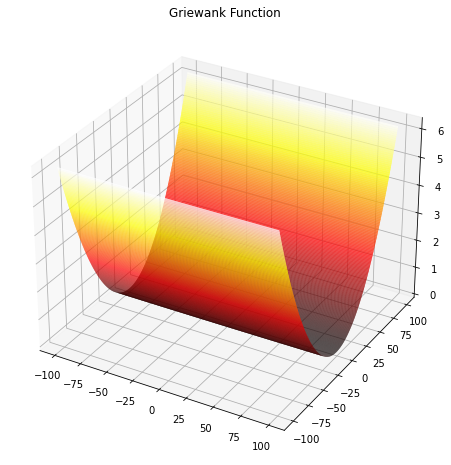

In [26]:
plot_3D_benchmark_function(objective_function_F1b, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

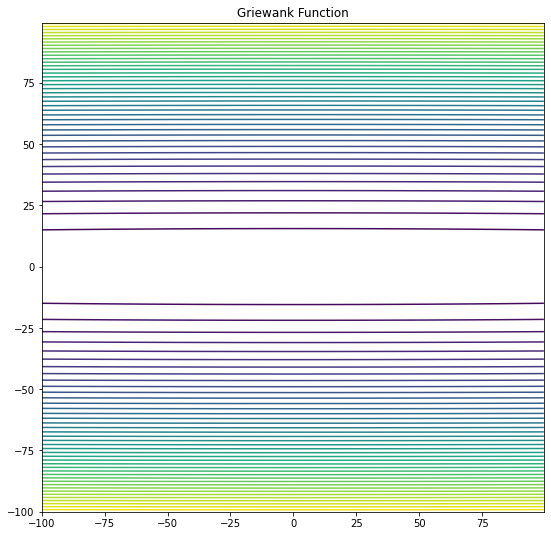

In [30]:
plot_contour_benchmark_function(objective_function_F1b, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function') 